In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5984c684c022d97a456628f767a44d07


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-37.38373304817398 34.67927086514575
-73.0638893301274 -128.23594994315985
18.047982014170643 166.6576170037972
-85.63287197066475 -13.582063150295056
34.64470113499962 -34.57032872920399
-72.33198694513665 109.59061984454371
47.9499171826825 153.17108097515325
-5.148770196870757 159.92397607464858
-49.86491867078749 143.00579982775878
-88.00264363065695 135.50767082174457
0.19412230850245749 -42.76199363611116
-28.349095065919563 -158.94695658468328
-89.85032250100552 8.416491967092696
-0.9878012350554286 164.72929878405006
-39.983390182173615 -116.0321872754865
-9.590774736551225 97.56843905338388
26.70961769611158 -73.98313760004335
36.84926588235457 -137.31216100142638
67.8161123025694 12.885120757810995
43.40641240588212 -12.072125391690378
19.818614832229528 -92.9189049431145
58.56053088160397 -112.0432756382882
-30.518473197197252 97.21834513882038
-88.13678818017277 -153.33837082862203
32.54157639545987 -153.93936064631833
19.911068338335355 71.77960942039257
2.672175170912354 

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

1. Import Dependencies, and Initialize an Empty List and Counters
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the city_url or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.
9. export the DataFrame as a CSV file

In [7]:
#Import Dependencies, (see above) and Initialize an Empty List and Counters

In [8]:
#Loop through the cities list.

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | buala
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | humberto de campos
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | cockburn town
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | sorland
Processing Record 19 of Set 1 | muros
Processing Record 20 of Set 1 | frontera
Processing Record 21 of Set 1 | athabasca
Processing R

Processing Record 37 of Set 4 | iqaluit
Processing Record 38 of Set 4 | concepcion
Processing Record 39 of Set 4 | abu dhabi
Processing Record 40 of Set 4 | serebryansk
Processing Record 41 of Set 4 | glenwood springs
Processing Record 42 of Set 4 | bell ville
Processing Record 43 of Set 4 | tessalit
Processing Record 44 of Set 4 | polson
Processing Record 45 of Set 4 | bilibino
Processing Record 46 of Set 4 | stettler
Processing Record 47 of Set 4 | pasaje
Processing Record 48 of Set 4 | hofn
Processing Record 49 of Set 4 | fuerte olimpo
Processing Record 50 of Set 4 | longyearbyen
Processing Record 1 of Set 5 | lata
Processing Record 2 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 5 | sao joao da barra
Processing Record 4 of Set 5 | mbini
Processing Record 5 of Set 5 | georgetown
Processing Record 6 of Set 5 | babstovo
Processing Record 7 of Set 5 | upernavik
Processing Record 8 of Set 5 | puerto ayora
Processing Record 9 of Set 5 | cherskiy
Processin

Processing Record 29 of Set 8 | olkhovatka
Processing Record 30 of Set 8 | jerome
Processing Record 31 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 32 of Set 8 | alice springs
Processing Record 33 of Set 8 | beloha
Processing Record 34 of Set 8 | coquimbo
Processing Record 35 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 36 of Set 8 | wanning
Processing Record 37 of Set 8 | gamarra
Processing Record 38 of Set 8 | thunder bay
Processing Record 39 of Set 8 | toftir
City not found. Skipping...
Processing Record 40 of Set 8 | bambanglipuro
Processing Record 41 of Set 8 | komsomolskiy
Processing Record 42 of Set 8 | vilhena
Processing Record 43 of Set 8 | ahipara
Processing Record 44 of Set 8 | tumut
Processing Record 45 of Set 8 | nalut
Processing Record 46 of Set 8 | sedelnikovo
City not found. Skipping...
Processing Record 47 of Set 8 | east london
Processing Record 48 of Set 8 | saint-pierre
Processing Record 49 of Set 8 | cap malheureux
Proces

Processing Record 13 of Set 12 | manzanillo
Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | trinidad
Processing Record 16 of Set 12 | smithers
Processing Record 17 of Set 12 | san cristobal
Processing Record 18 of Set 12 | eskasem
City not found. Skipping...
Processing Record 19 of Set 12 | rio grande
Processing Record 20 of Set 12 | pontianak
Processing Record 21 of Set 12 | mrirt
City not found. Skipping...
Processing Record 22 of Set 12 | crestview
Processing Record 23 of Set 12 | cortez
Processing Record 24 of Set 12 | anshan
Processing Record 25 of Set 12 | saint-georges
Processing Record 26 of Set 12 | broken hill
Processing Record 27 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 28 of Set 12 | farah
Processing Record 29 of Set 12 | kholm
Processing Record 30 of Set 12 | marawi
Processing Record 31 of Set 12 | timmins
Processing Record 32 of Set 12 | comodoro rivadavia
Processing Record 33 of Set 12 | memmingen
Processing Record 34 o

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,80.40,74,9,13.58,PF,2023-03-01 04:07:25
1,Butaritari,3.0707,172.7902,82.17,76,86,14.50,KI,2023-03-01 04:11:11
2,Cape Town,-33.9258,18.4232,68.38,81,81,17.00,ZA,2023-03-01 04:09:57
3,Ribeira Grande,38.5167,-28.7000,60.78,86,55,25.99,PT,2023-03-01 04:11:12
4,Albany,42.6001,-73.9662,34.81,91,61,8.03,US,2023-03-01 04:11:12
5,Severo-Kurilsk,50.6789,156.1250,24.62,90,100,16.13,RU,2023-03-01 04:08:58
6,Buala,-8.1450,159.5921,81.84,81,97,18.21,SB,2023-03-01 04:11:13
7,New Norfolk,-42.7826,147.0587,71.10,50,49,10.00,AU,2023-03-01 04:11:14
8,Hobart,-42.8794,147.3294,71.46,47,40,21.85,AU,2023-03-01 04:05:16
9,Humberto De Campos,-2.5983,-43.4611,75.20,94,93,4.09,BR,2023-03-01 04:11:14


In [21]:
city_data_df.shape

(576, 9)

In [32]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df.isnull().sum()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [15]:
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [33]:
cities_data_df = city_data_df[new_column_order]

In [34]:
cities_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2023-03-01 04:07:25,-23.1203,-134.9692,80.40,74,9,13.58
1,Butaritari,KI,2023-03-01 04:11:11,3.0707,172.7902,82.17,76,86,14.50
2,Cape Town,ZA,2023-03-01 04:09:57,-33.9258,18.4232,68.38,81,81,17.00
3,Ribeira Grande,PT,2023-03-01 04:11:12,38.5167,-28.7000,60.78,86,55,25.99
4,Albany,US,2023-03-01 04:11:12,42.6001,-73.9662,34.81,91,61,8.03


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
cities_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

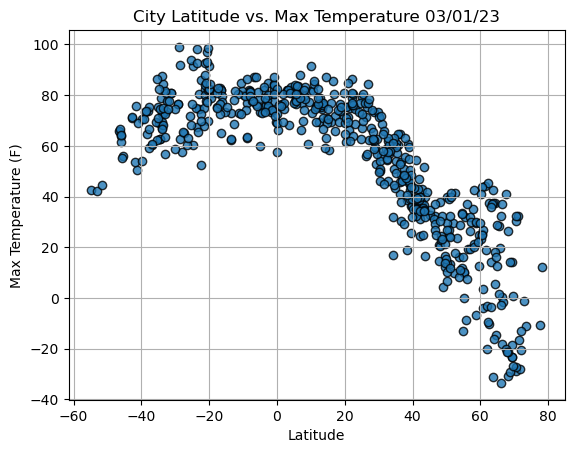

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

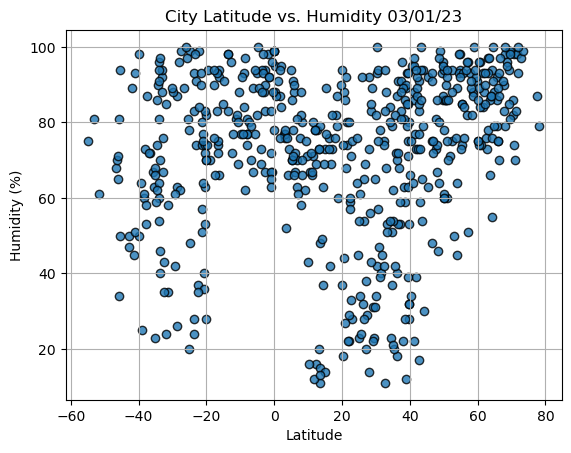

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


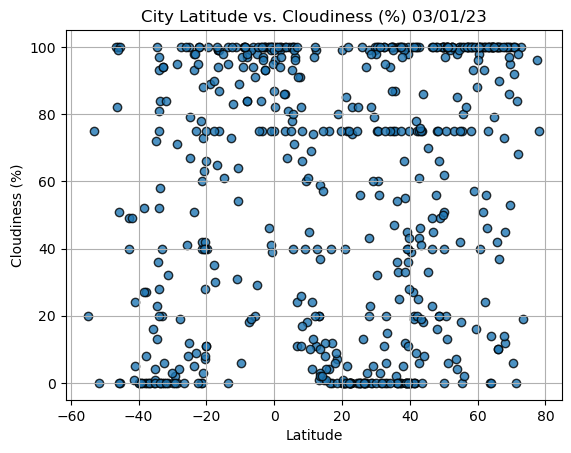

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()